Script with loop to generate FFTs of important regions 

In [36]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


C:\Users\celie\OneDrive\Documenten\TVB_Windows_2.2\TVB_Distribution\tvb_data\Lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['indices', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [37]:
from tvb.simulator.lab import *
import h5py
import os
import matplotlib.pyplot as plt

import scipy 
import scipy.fftpack
import seaborn as sns

In [57]:
os.chdir("C:/Users/celie/OneDrive - ugentbe/NOG NODIG/2de master/Masterproef/Wilson Cowan/DATA")

In [58]:
#import healthy Q = 1 data    = model with same parameters in all regions
filename = "Healthy10s.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    datapoints = list(f['data'])
    datatime = list(f['time'])

dataHealthyOne = np.array(datapoints)
timeHealthyOne = np.array(datatime)

#import depressed model with Q = 0 in some regions
filename = "Depr10s.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    datapoints = list(f['data'])
    datatime = list(f['time'])

dataDepr = np.array(datapoints)
timeDepr = np.array(datatime)

Keys: <KeysViewHDF5 ['data', 'time']>
Keys: <KeysViewHDF5 ['data', 'time']>


In [59]:
#delete first 500ms from datasets (both data and time) to cut out the artefact in the beginning 

#create list with values 0 to 499 to delete first 500 rows 
list_deleterows = [*range(0,500,1)]

#delete first 500 rows from all datasets (both datapoints and time)
dataDepr = np.delete(dataDepr, list_deleterows, 0)
timeDepr = np.delete(timeDepr, list_deleterows, 0)

dataHealthyOne = np.delete(dataHealthyOne, list_deleterows, 0)
timeHealthyOne = np.delete(timeHealthyOne, list_deleterows, 0)

print(dataDepr.shape)
print(timeDepr.shape)

(9740, 4, 76, 1)
(9740,)


In [41]:
#import connectivity file to know which region corresponds to which index in the matrices
filename = "Connectivity.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    regions_list = list(f['region_labels'])

regions = np.array(regions_list)

#interesting regions
# 18 = rDLPFC
# 21 = rPFCORB
# 35 = rV1
# 36 = rV2

# 56 = lDLPFC
# 59 = rPFCORB
# 73 = rV1
# 74 = rV2

#parietal cortex
#PCM  = 15
#PCI  = 13
#PCS  = 16


#make selection of regions to loop through 
indices = [13,18,35] #[13,15,16,18,21,35,36,56,59,73,74]


Keys: <KeysViewHDF5 ['areas', 'centres', 'cortical', 'hemispheres', 'orientations', 'region_labels', 'tract_lengths', 'weights']>


In [60]:
#select correct colomns from datasets
HealthyOne = dataHealthyOne[:, 0, :, 0]
Depressed  = dataDepr[:, 0, :, 0] 

Back to FFT: first change directory to save images in right folder

In [61]:
os.chdir("C:/Users/celie/OneDrive - ugentbe/NOG NODIG/2de master/Masterproef/Wilson Cowan/Figures/Coherence")

In [62]:
#important variables of dataset
sample_period = 0.0009765625 #seconds
sf = 1/sample_period #sampling frequency 
sample_rate = 1024
duration = len(timeDepr)
print(sf)

1024.0


<IPython.core.display.Javascript object>


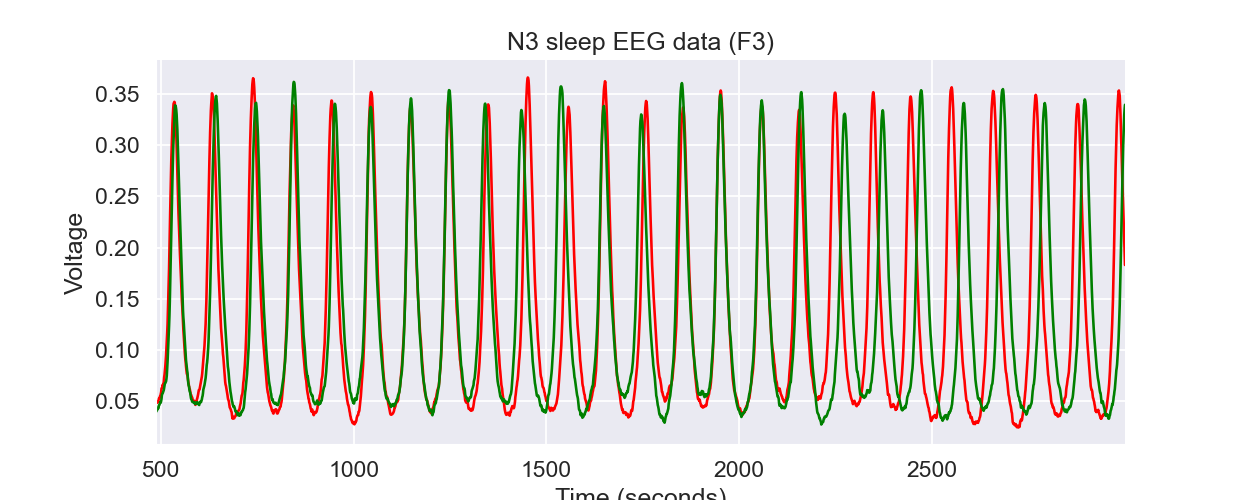

In [54]:
#define two regions to compare 
data_R1 = HealthyOne[:,18]
data_R2 = HealthyOne[:,56]

# Define sampling frequency and time vector
time_R1 = timeHealthyOne
time_R1 = timeDepr #np.arange(data.size) / sf
time_R1 = timeHealthyOne

# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
plt.plot(time_depr, data_depr, lw=1.5, color='red')
plt.plot(time_health, data_health, lw=1.5, color='green')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')
plt.xlim([time_depr.min(), time_depr.max()])
plt.title('N3 sleep EEG data (F3)')
sns.despine()

<IPython.core.display.Javascript object>


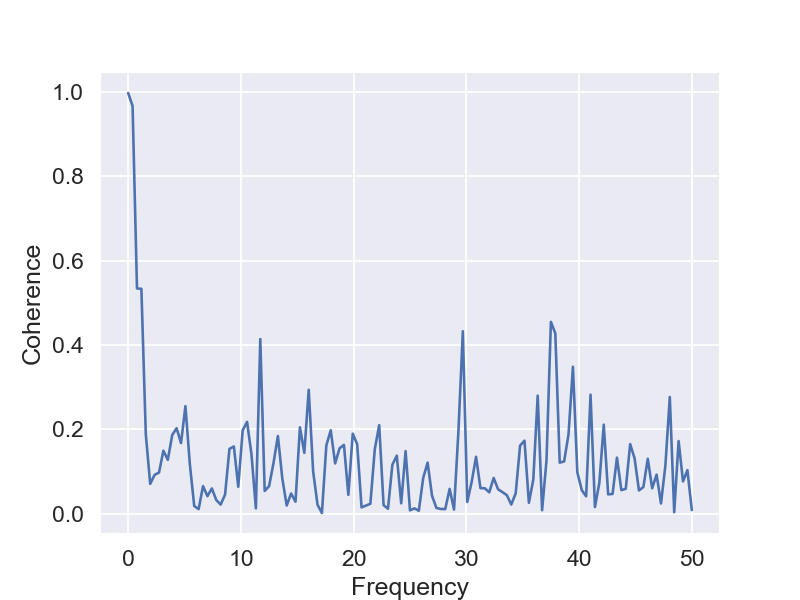

In [55]:
figure(4)
coh, f = plt.cohere(data_health, data_depr, 256, 1./.01)
plt.show()

C:\Users\celie\OneDrive\Documenten\TVB_Windows_2.2\TVB_Distribution\tvb_data\Lib\site-packages\scipy\signal\spectral.py:1963: UserWarning: nperseg = 4096 is greater than input length  = 2572, using nperseg = 2572
  .format(nperseg, input_length))
C:\Users\celie\OneDrive\Documenten\TVB_Windows_2.2\TVB_Distribution\tvb_data\Lib\site-packages\scipy\signal\spectral.py:1963: UserWarning: nperseg = 4096 is greater than input length  = 2572, using nperseg = 2572
  .format(nperseg, input_length))


<IPython.core.display.Javascript object>


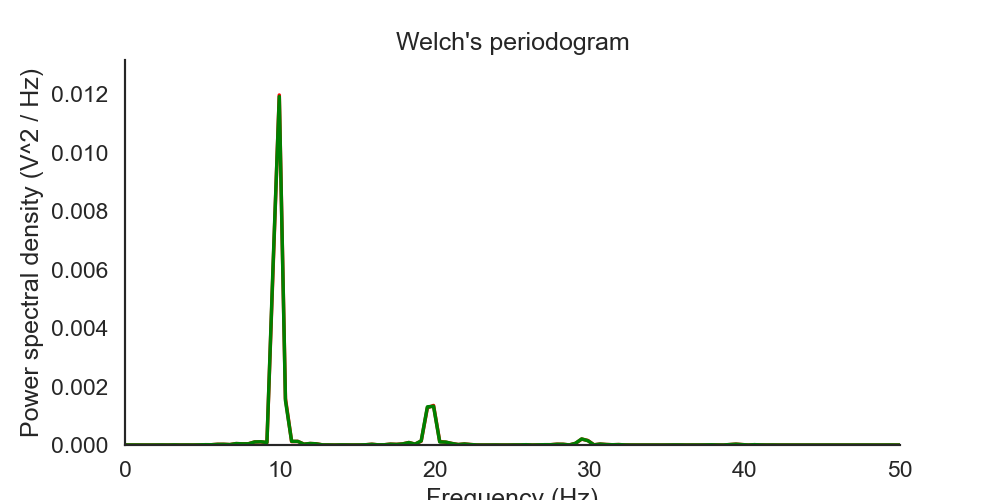

In [31]:
from scipy import signal

# Define window length (4 seconds)
win = 4 * sf
freqs_depr, psd_depr     = signal.welch(data_depr, sf, nperseg=win)
freqs_health, psd_health = signal.welch(data_health, sf, nperseg=win)

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(freqs_depr, psd_depr, color='red', lw=2)
plt.plot(freqs_health, psd_health, color='green', lw=2)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd_depr.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, 50])
sns.despine()

In [23]:
from scipy.integrate import simps
# Define alpha lower and upper limits
low, high = 8, 12

# Find intersecting values in frequency vector
idx_alpha_depr = np.logical_and(freqs_depr >= low, freqs_depr <= high)
idx_alpha_health = np.logical_and(freqs_health >= low, freqs_health <= high)

# Frequency resolution
freq_res_depr = freqs_depr[1] - freqs_depr[0]  # = 1 / 4 = 0.25
freq_res_health = freqs_health[1] - freqs_health[0]  # = 1 / 4 = 0.25

# Compute the absolute power by approximating the area under the curve
alpha_power_depr = simps(psd_depr[idx_alpha_depr], dx=freq_res_depr)
print('Absolute alpha power depressed: %.3f uV^2' % alpha_power_depr)

alpha_power_health = simps(psd_health[idx_alpha_health], dx=freq_res_health)
print('Absolute alpha power health: %.3f uV^2' % alpha_power_health)

# Relative alpha power (expressed as a percentage of total power): depressed
total_power_depr = simps(psd_depr, dx=freq_res_depr)
delta_rel_power_depr = alpha_power_depr / total_power_depr
print('Relative alpha power depressed: %.3f' % delta_rel_power_depr)

# Relative alpha power (expressed as a percentage of total power): depressed
total_power_health = simps(psd_health, dx=freq_res_health)
delta_rel_power_health = alpha_power_health / total_power_health
print('Relative alpha power health: %.3f' % delta_rel_power_health)

Absolute alpha power depressed: 0.014 uV^2
Absolute alpha power health: 0.008 uV^2
Relative alpha power depressed: 0.959
Relative alpha power health: 0.755


In [26]:
from scipy.integrate import simps

for i in range (3):
    if i == 0:
        low, high = 8, 12 # alpha
        band = 'alpha'
    elif i == 1:
        low, high = 12, 38 #beta
        band = 'beta'
    elif i == 2:
        low, high = 4, 7 #theta
        band = 'theta'

    # Find intersecting values in frequency vector
    idx_depr = np.logical_and(freqs_depr >= low, freqs_depr <= high)
    idx_health = np.logical_and(freqs_health >= low, freqs_health <= high)

    # Frequency resolution
    freq_res_depr = freqs_depr[1] - freqs_depr[0]  # = 1 / 4 = 0.25
    freq_res_health = freqs_health[1] - freqs_health[0]  # = 1 / 4 = 0.25

    # Compute the absolute power by approximating the area under the curve
    power_depr = simps(psd_depr[idx_alpha_depr], dx=freq_res_depr)
    print('Absolute ' + str(band) + ' power depressed: %.3f uV^2' % power_depr)

    power_health = simps(psd_health[idx_alpha_health], dx=freq_res_health)
    print('Absolute ' + str(band) + ' power health: %.3f uV^2' % power_health)

    # Relative alpha power (expressed as a percentage of total power): depressed
    total_power_depr = simps(psd_depr, dx=freq_res_depr)
    delta_rel_power_depr = power_depr / total_power_depr
    print('Relative ' + str(band)  + ' power depressed: %.3f' % delta_rel_power_depr)

    # Relative alpha power (expressed as a percentage of total power): depressed
    total_power_health = simps(psd_health, dx=freq_res_health)
    delta_rel_power_health = power_health / total_power_health
    print('Relative ' + str(band) + ' power health: %.3f' % delta_rel_power_health)

Absolute alpha power depressed: 0.014 uV^2
Absolute alpha power health: 0.008 uV^2
Relative alpha power depressed: 0.959
Relative alpha power health: 0.755
Absolute beta power depressed: 0.014 uV^2
Absolute beta power health: 0.008 uV^2
Relative beta power depressed: 0.959
Relative beta power health: 0.755
Absolute theta power depressed: 0.014 uV^2
Absolute theta power health: 0.008 uV^2
Relative theta power depressed: 0.959
Relative theta power health: 0.755


In [35]:
from scipy.integrate import simps

# Define sampling frequency and time vector
time_depr = timeDepr #np.arange(data.size) / sf
time_health = timeHealthyOne

for nr in indices:
    indices = [13,18,35]
    if nr == 13: ROI = "PCI"
    elif nr == 18: ROI = "rDLPFC"
    elif nr == 35: ROI = "rV1"
        
    data_depr = Depressed[:,nr]
    data_health = HealthyOne[:,nr]
    
    freqs_depr, psd_depr     = signal.welch(data_depr, sf, nperseg=win)
    freqs_health, psd_health = signal.welch(data_health, sf, nperseg=win)
    
    # Find intersecting values in frequency vector
    idx_depr = np.logical_and(freqs_depr >= low, freqs_depr <= high)
    idx_health = np.logical_and(freqs_health >= low, freqs_health <= high)

    # Frequency resolution
    freq_res_depr = freqs_depr[1] - freqs_depr[0]  # = 1 / 4 = 0.25
    freq_res_health = freqs_health[1] - freqs_health[0]  # = 1 / 4 = 0.25
    
    print("")
    print("Testing region: " + str(ROI))
    print("")
    
    for i in range (3):
        if i == 0:
            low, high = 8, 12 # alpha
            band = 'alpha'
        elif i == 1:
            low, high = 12, 38 #beta
            band = 'beta'
        elif i == 2:
            low, high = 4, 7 #theta
            band = 'theta'

        # Find intersecting values in frequency vector
        idx_depr = np.logical_and(freqs_depr >= low, freqs_depr <= high)
        idx_health = np.logical_and(freqs_health >= low, freqs_health <= high)

        # Frequency resolution
        freq_res_depr = freqs_depr[1] - freqs_depr[0]  # = 1 / 4 = 0.25
        freq_res_health = freqs_health[1] - freqs_health[0]  # = 1 / 4 = 0.25

        # Compute the absolute power by approximating the area under the curve
        power_depr = simps(psd_depr[idx_alpha_depr], dx=freq_res_depr)
        print('Absolute ' + str(band) + ' power depressed: %.3f uV^2' % power_depr)

        power_health = simps(psd_health[idx_alpha_health], dx=freq_res_health)
        print('Absolute ' + str(band) + ' power health: %.3f uV^2' % power_health)

        # Relative alpha power (expressed as a percentage of total power): depressed
        total_power_depr = simps(psd_depr, dx=freq_res_depr)
        delta_rel_power_depr = power_depr / total_power_depr
        print('Relative ' + str(band)  + ' power depressed: %.3f' % delta_rel_power_depr)

        # Relative alpha power (expressed as a percentage of total power): depressed
        total_power_health = simps(psd_health, dx=freq_res_health)
        delta_rel_power_health = power_health / total_power_health
        print('Relative ' + str(band) + ' power health: %.3f' % delta_rel_power_health)
    


Testing region: PCI

[False False False ... False False False]
Absolute alpha power depressed: 0.008 uV^2
Absolute alpha power health: 0.008 uV^2
Relative alpha power depressed: 0.776
Relative alpha power health: 0.777
[False False False ... False False False]
Absolute beta power depressed: 0.008 uV^2
Absolute beta power health: 0.008 uV^2
Relative beta power depressed: 0.776
Relative beta power health: 0.777
[False False False ... False False False]
Absolute theta power depressed: 0.008 uV^2
Absolute theta power health: 0.008 uV^2
Relative theta power depressed: 0.776
Relative theta power health: 0.777

Testing region: rDLPFC

[False False False ... False False False]
Absolute alpha power depressed: 0.014 uV^2
Absolute alpha power health: 0.008 uV^2
Relative alpha power depressed: 0.959
Relative alpha power health: 0.755
[False False False ... False False False]
Absolute beta power depressed: 0.014 uV^2
Absolute beta power health: 0.008 uV^2
Relative beta power depressed: 0.959
Relat

C:\Users\celie\OneDrive\Documenten\TVB_Windows_2.2\TVB_Distribution\tvb_data\Lib\site-packages\scipy\signal\spectral.py:1963: UserWarning: nperseg = 4096 is greater than input length  = 2572, using nperseg = 2572
  .format(nperseg, input_length))
C:\Users\celie\OneDrive\Documenten\TVB_Windows_2.2\TVB_Distribution\tvb_data\Lib\site-packages\scipy\signal\spectral.py:1963: UserWarning: nperseg = 4096 is greater than input length  = 2572, using nperseg = 2572
  .format(nperseg, input_length))
C:\Users\celie\OneDrive\Documenten\TVB_Windows_2.2\TVB_Distribution\tvb_data\Lib\site-packages\scipy\signal\spectral.py:1963: UserWarning: nperseg = 4096 is greater than input length  = 2572, using nperseg = 2572
  .format(nperseg, input_length))
C:\Users\celie\OneDrive\Documenten\TVB_Windows_2.2\TVB_Distribution\tvb_data\Lib\site-packages\scipy\signal\spectral.py:1963: UserWarning: nperseg = 4096 is greater than input length  = 2572, using nperseg = 2572
  .format(nperseg, input_length))
C:\Users\cel